In [ ]:
from keras.layers.core.dropout import Dropout
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
import cv2

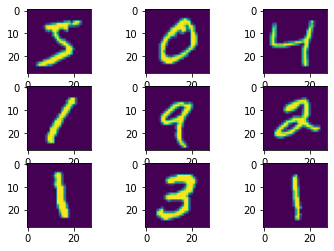

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000,)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000,)


In [ ]:
#Chia dữ liệu
(x_train, y_train),(x_test,y_test) = mnist.load_data()
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

In [ ]:
#Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000, 10)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000, 10)


In [ ]:
#tao 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [ ]:
#tao modle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#train 
history = model.fit(x_train, y_train, batch_size=128,epochs=20,
                    validation_data = (x_test, y_test), verbose=1)      
#luu model
model.save('NHT_Mnist.h5')

Epoch 1/20
469/469 [==============================] - 26s 54ms/step - loss: 0.2657 - accuracy: 0.9197 - val_loss: 0.1400 - val_accuracy: 0.9565
Epoch 2/20
469/469 [==============================] - 28s 60ms/step - loss: 0.1075 - accuracy: 0.9685 - val_loss: 0.0920 - val_accuracy: 0.9717
Epoch 3/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0713 - accuracy: 0.9793 - val_loss: 0.0617 - val_accuracy: 0.9803
Epoch 4/20
469/469 [==============================] - 25s 54ms/step - loss: 0.0544 - accuracy: 0.9843 - val_loss: 0.0560 - val_accuracy: 0.9826
Epoch 5/20
469/469 [==============================] - 25s 53ms/step - loss: 0.0438 - accuracy: 0.9875 - val_loss: 0.0499 - val_accuracy: 0.9843
Epoch 6/20
469/469 [==============================] - 26s 56ms/step - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.0491 - val_accuracy: 0.9838
Epoch 7/20
469/469 [==============================] - 25s 53ms/step - loss: 0.0311 - accuracy: 0.9912 - val_loss: 0.0452 - val_accuracy:

In [ ]:
#load model 
from tensorflow import keras
model = keras.models.load_model('NHT_Mnist.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

Sai số kiểm tra là:  0.03961671516299248
Độ chính xác kiểm tra là:  0.9873999953269958


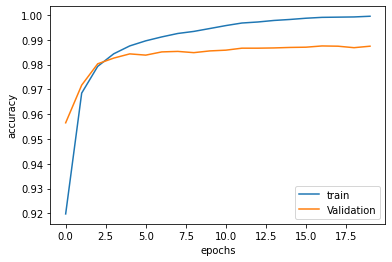

In [ ]:
#ve do thi
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
from google.colab import files
uploaded=files.upload()